## Creating your own functions for import

### Our example comes from crystallography and will require some matrix manipulation so let's 
#### 1. take a refresher on matrices
#### 2. look at creating and testing a function
#### 3. copy function to a text file *.py for import

When dealing with matrices, you will want to use the numpy.linalg module. You can read the documentation here: https://numpy.org/doc/stable/reference/routines.linalg.html

In [38]:
import numpy as np  #the linalg module would then be np.linalg

#### defining a matrix as a numpy array

In [19]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
B=np.array([[11,21,31],[41,51,61],[71,81,91]])
print(B)
A

[[11 21 31]
 [41 51 61]
 [71 81 91]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### multiplying matrices np.dot()

In [21]:
np.dot(A,B)

array([[ 306,  366,  426],
       [ 675,  825,  975],
       [1044, 1284, 1524]])

#### example:  gmatrix used in crystallography

| | |
|-|-|
|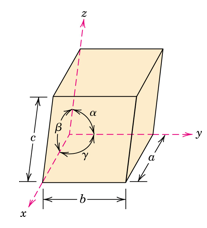  |$$ g=\begin{bmatrix}a^{2} & ab \cos{(\gamma)}&ac \cos (\beta) \\ab \cos(\gamma) & b^2 & bc \cos (\alpha) \\ ac  \cos(\beta) & bc \cos(\alpha)&c^2 \end{bmatrix}$$|


#### simple case: gmatrix for white tin (tetragonal)
a = b = 0.583 nm
c = 0.318 nm
$\alpha = \beta = \gamma = 90^{\circ}$

In [22]:
g=np.array([[0.583**2, 0,0],[0,0.583**2, 0],[0,0,0.318**2]])
g

array([[0.339889, 0.      , 0.      ],
       [0.      , 0.339889, 0.      ],
       [0.      , 0.      , 0.101124]])

#### Volume of the unit cell for Tin = sqrt of determinant of $g$

In [23]:
0.583*0.583*0.318

0.10808470199999998

In [24]:
np.sqrt(np.linalg.det(g))

0.108084702

#### Gmatrix for any a, b, c, $\alpha, \beta, \gamma$

In [49]:
def gmatrix(a,b,c,alpha,beta,gamma):
    alpha=np.deg2rad(alpha)
    beta=np.deg2rad(beta)
    gamma=np.deg2rad(gamma)
    g=np.array([
    [a*a, a*b*np.cos(gamma), a*c*np.cos(beta)],
    [b*a*np.cos(gamma), b*b, b*c*np.cos(alpha)], 
    [c*a*np.cos(beta),c*b*np.cos(alpha),c*c]
    ])
    return(g)
    

In [50]:
gmatrix(1,2,3, 90,90,90)

array([[1.0000000e+00, 1.2246468e-16, 1.8369702e-16],
       [1.2246468e-16, 4.0000000e+00, 3.6739404e-16],
       [1.8369702e-16, 3.6739404e-16, 9.0000000e+00]])

#### Write the function & test

In [51]:
def vuc(a,b,c,alpha, beta, gamma):
    alpha=np.deg2rad(alpha)
    beta=np.deg2rad(beta)
    gamma=np.deg2rad(gamma)
    g=np.array([
    [a*a, a*b*np.cos(gamma), a*c*np.cos(beta)],
    [b*a*np.cos(gamma), b*b, b*c*np.cos(alpha)], 
    [c*a*np.cos(beta),c*b*np.cos(alpha),c*c]
    ])
    vol=np.sqrt(np.linalg.det(g))
    return(vol)
    

In [52]:
vuc(1,2,3, 90,90,90)

6.0

#### Put it all in one cell, test again after restarting Kernel, copy to text file *.py

In [37]:
"""
Unit Cell Volume

The following function calculates the volume of a unit cell of any crystal system 
given the lattice parameters a,b,c,alpha,beta,gamma
"""

import numpy as np

def vuc(a,b,c,alpha, beta, gamma):
    alpha=np.deg2rad(alpha)
    beta=np.deg2rad(beta)
    gamma=np.deg2rad(gamma)
    g=np.array([
    [a*a, a*b*np.cos(gamma), a*c*np.cos(beta)],
    [b*a*np.cos(gamma), b*b, b*c*np.cos(alpha)], 
    [c*a*np.cos(beta),c*b*np.cos(alpha),c*c]
    ])
    vol=np.sqrt(np.linalg.det(g))
    return(vol)

In [38]:
vuc(1,2,3, 90,90,90)

6.0

Now copy the above cell into a file "your".py  
"your" = whatever name you pick.

Now go and import your .py file in another notebook and see if it works!